# Predicting heart disease using machine learning

This machine learning model can be used to predict if someone has heart disease based on their medical report.

We're going to take the following approach:

<ol>
    <li>Problem Definition</li>
    <li>Data</li>
    <li>Evaluation</li>
    <li>Features</li>
    <li>Modelling</li>
    <li>Exparimentation</li>
</ol>

## 1. Problem Defination

In a statement,
> Develop a machine learning model to predict the likelihood of heart disease based on an individual's medical history and clinical features, aiming for high accuracy in early detection and intervention.

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/dataset/45/heart+disease

## 3. Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

Using this you will get different information about each of the features in your data

**Data dictinory**

1. **age:** Age in years.
2. **sex:** Gender (1 = male; 0 = female).
3. **cp:** Chest pain type:
    - 0: Typical angina (chest pain related to decreased blood supply to the heart).
    - 1: Atypical angina (chest pain not related to the heart).
    - 2: Non-anginal pain (typically esophageal spasms, non-heart related).
    - 3: Asymptomatic (chest pain not showing signs of disease).
4. **trestbps:** Resting blood pressure (mm Hg) on admission to the hospital. Anything above 130-140 is typically cause for concern.
5. **chol:** Serum cholesterol in mg/dl. Above 200 is cause for concern.
6. **fbs:** Fasting blood sugar (> 120 mg/dl) (1 = true; 0 = false). '>126' mg/dL signals diabetes.
7. **restecg:** Resting electrocardiographic results:
    - 0: Nothing to note.
    - 1: ST-T Wave abnormality (signals non-normal heart beat).
    - 2: Possible or definite left ventricular hypertrophy (enlarged heart's main pumping chamber).
8. **thalach:** Maximum heart rate achieved.
9. **exang:** Exercise-induced angina (1 = yes; 0 = no).
10. **oldpeak:** ST depression induced by exercise relative to rest. Looks at stress of heart during exercise (unhealthy heart will stress more).
11. **slope:** The slope of the peak exercise ST segment:
    - 0: Upsloping (better heart rate with exercise, uncommon).
    - 1: Flatsloping (typical healthy heart, minimal change).
    - 2: Downsloping (signs of unhealthy heart).
12. **ca:** Number of major vessels (0-3) colored by fluoroscopy. Colored vessel means the doctor can see the blood passing through (more blood movement is better, no clots).
13. **thal:** Thalium stress result:
    - 1, 3: Normal.
    - 6: Fixed defect (used to be a defect but now okay).
    - 7: Reversible defect (no proper blood movement when exercising).
14. **target:** Presence of heart disease (1 = yes, 0 = no, predicted attribute).
 0=no) (= the predicted attribute)

## Preparing the Tools

In [1]:
# Import all tools

# Regualr data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#We want plots appear inside the notebook
%matplotlib inline

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


## Load data

In [2]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
# Data exploration
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#How many of each class
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

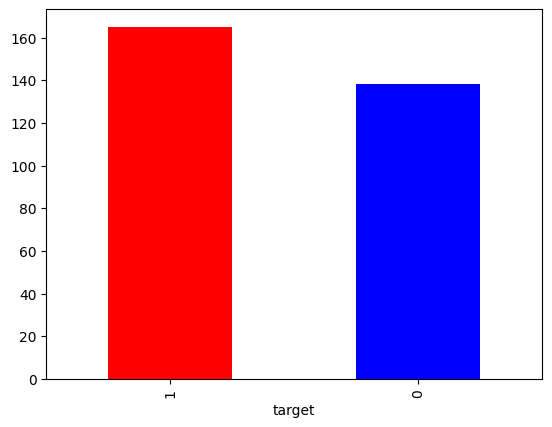

In [5]:
df["target"].value_counts().plot(kind="bar",color=["red","blue"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Heart Disease Frequency according to sex

In [8]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

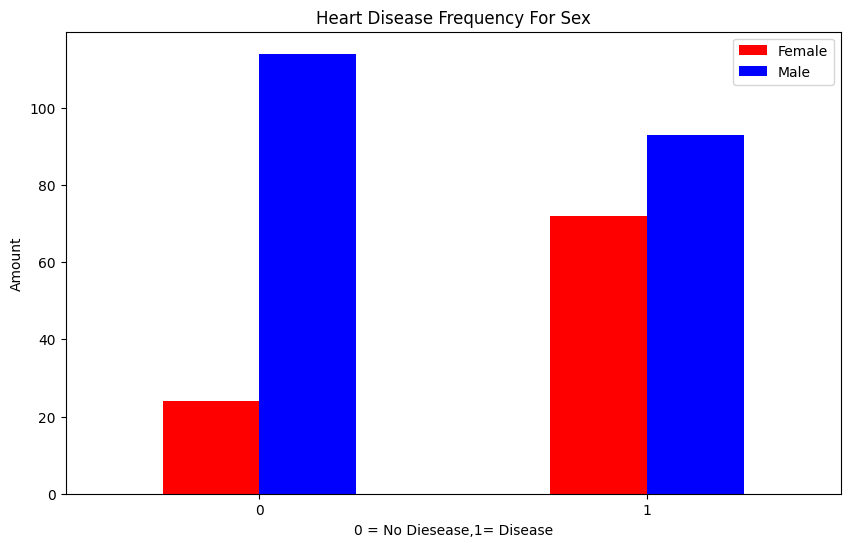

In [10]:
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["red","blue"])
plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = No Diesease,1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

In [11]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age vs Max Heart Rate for Heart Disease

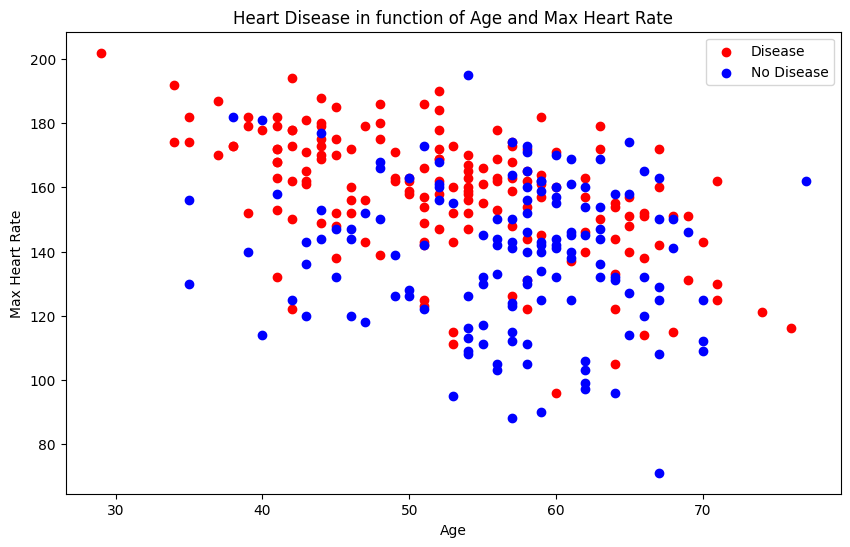

In [12]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="red")
# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="blue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

<Axes: ylabel='Frequency'>

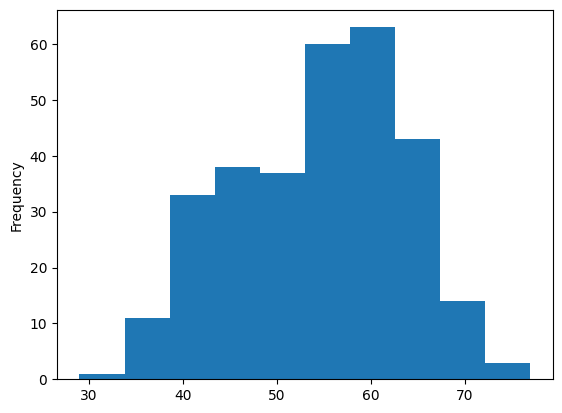

In [13]:
#check the distribution of age
df.age.plot.hist()

 ### Heart Disease Frequency per Chest Pain Type

In [14]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

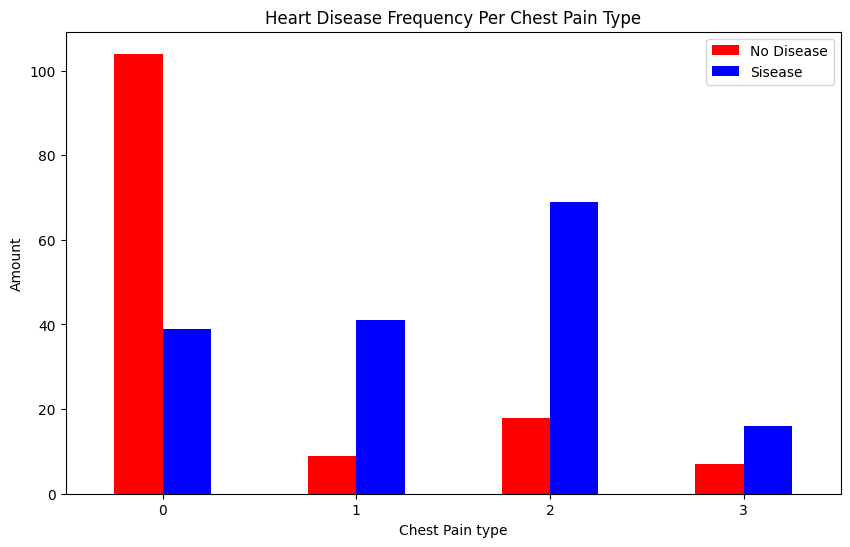

In [15]:
# Make the crosstab more visual

pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["red","blue"])
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain type")
plt.ylabel("Amount")
plt.legend(["No Disease","Sisease"])
plt.xticks(rotation=0)

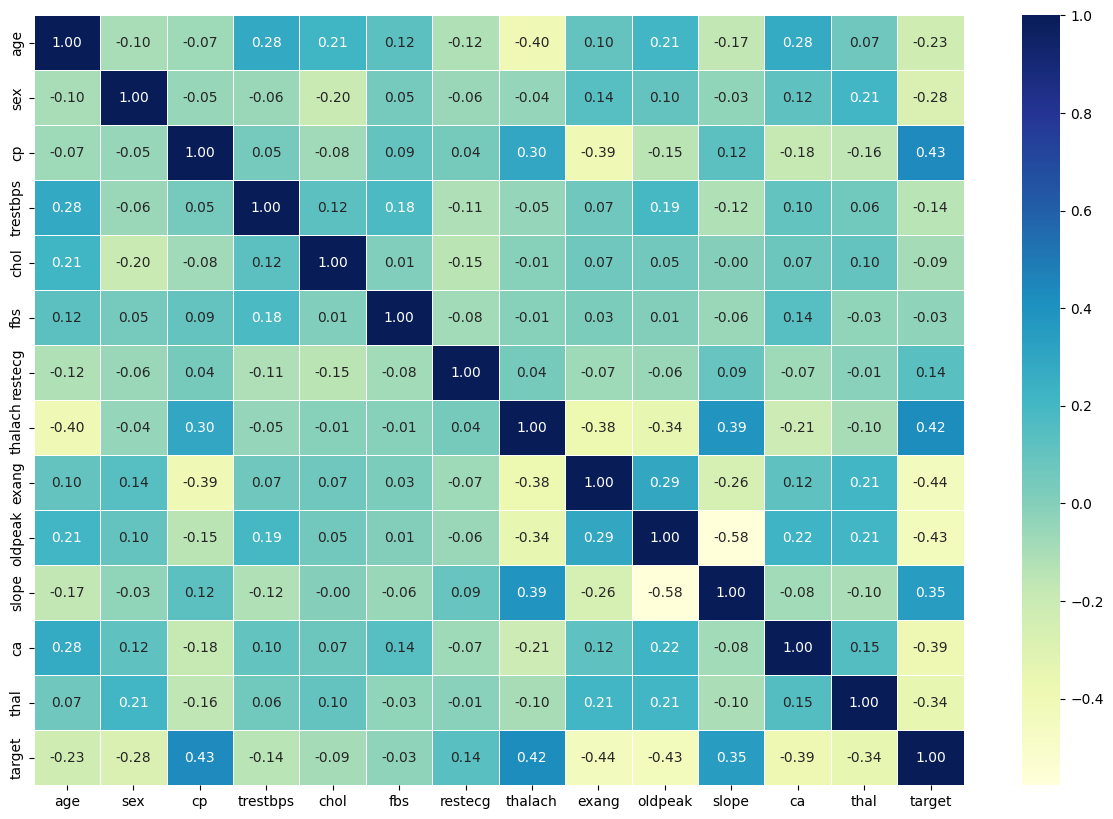

In [16]:
# Make correlation matrix
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu"
              )



## Modeling

In [17]:
#split data into x & y
X=df.drop("target",axis=1)
y=df["target"]


In [18]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
# split data into train and test sets
np.random.seed(42)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

**Building  Machine Learning Model**

In [20]:
# Put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()
       }

#Create function to fit & score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """   
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    #Set Random seed
    np.random.seed(42)
    #Make a dictinary to keep model scores
    model_scores={}
    #Loop models
    for name, model in models.items():
        model.fit(X_train,y_train)
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [21]:
model_scores=fit_and_score(models,X_train,X_test,y_train,y_test)
model_scores

D:\My Projects\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

In [22]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.836066


In [23]:
model_compare.T

,accuracy
Logistic Regression,0.885246
KNN,0.688525
Random Forest,0.836066


<Axes: >

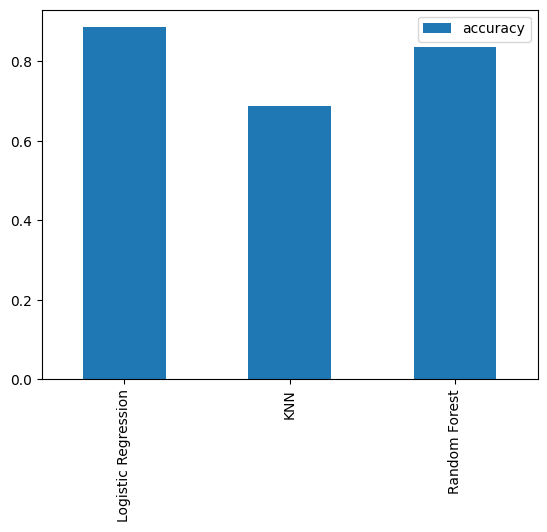

In [24]:
model_compare.T.plot.bar()

### Hyperparameter tuning

In [25]:
# KNN
train_scores=[]
test_scores=[]

#create a list of different values for n_neighbros
neighbors=range(1,21)

# Setup KNN instance
knn=KNeighborsClassifier()

#Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithem
    knn.fit(X_train,y_train)
    #updating training scores list
    train_scores.append(knn.score(X_train,y_train))
    #Updating the test scores list
    test_scores.append(knn.score(X_test,y_test))


Maximum KNN score on the test data:75.41%


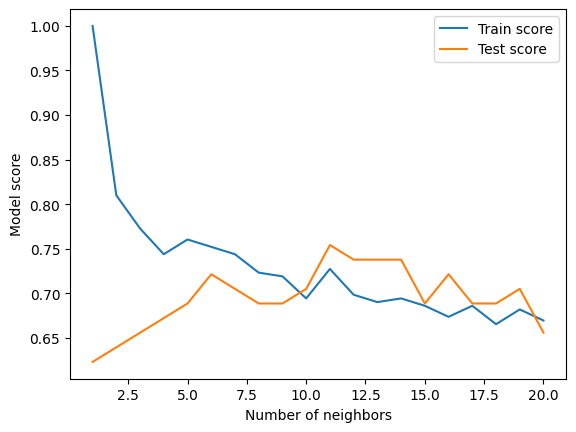

In [26]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data:{max(test_scores)*100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV

In [27]:
# create a hyperparameter grid for logisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}

#create a hy[er[arameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [28]:
#Tune Logistic Regression

np.random.seed(42)

# Setup random hyperparameter search for logisticRegression
rs_los_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
#Fit random hyperparameter search model for logisticRegression
rs_los_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_los_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [30]:
rs_los_reg.score(X_test,y_test)

0.8852459016393442

In [31]:
np.random.seed(42)
#random hyperparameter search for RandomForestClasifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [32]:
# Find best parameters
rs_los_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

In [34]:
#Different hyperparameters for our Logistic Regression model
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":["liblinear"]}
#Setup for LogisticRegression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
#Fit the model
gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [35]:
# Best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [41]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating tuned ML classifier

In [37]:
y_preds=gs_log_reg.predict(X_test)

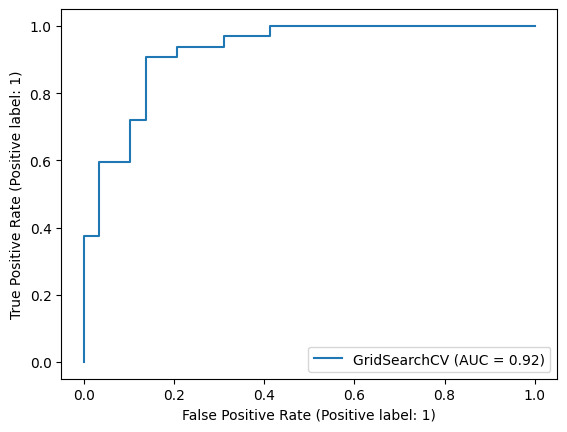

In [53]:
# Import ROC curve function from the sklearn.metrics module and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)


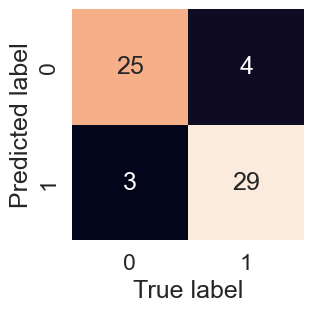

In [54]:
# confusion metrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

plot_conf_mat(y_test,y_preds)

In [56]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-Validation

we will using `cross_val_score`

In [57]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [88]:
# New clasiffifier with best parameters
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

In [89]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [95]:
cv_acc=np.mean(accuracy)
cv_acc

0.8479781420765027

In [96]:
# Cross-validated precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [103]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [104]:
# cross- validated f1-score
cv_f1=cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

<Axes: title={'center': 'Cross-validated classification metrics'}>

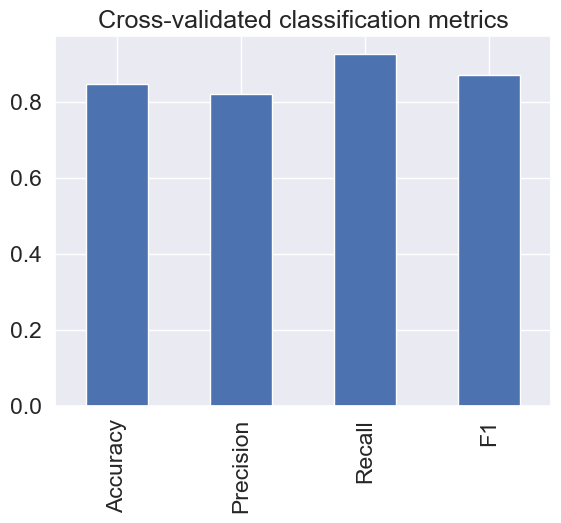

In [105]:
# Example data (replace these with your actual data)
# Create DataFrame
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0])

# Transpose the DataFrame and plot the bar chart
cv_metrics.T.plot.bar(
    title="Cross-validated classification metrics",
    legend=False
)

### Feature Importance

Features most contributes to heart dieses

In [107]:
# Fit an instance of LogisticRegression
clf=LogisticRegression(C=0.23357214690901212,solver='liblinear')

clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [114]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003699219393946938,
 'sex': -0.9042408694997455,
 'cp': 0.6747282718496431,
 'trestbps': -0.01161340293294992,
 'chol': -0.0017036445187558994,
 'fbs': 0.0478768869355857,
 'restecg': 0.33490190640612627,
 'thalach': 0.024729384262128506,
 'exang': -0.6312040272395671,
 'oldpeak': -0.5759092502488238,
 'slope': 0.4709512530750857,
 'ca': -0.6516534979207133,
 'thal': -0.699842030571726}

<Axes: title={'center': 'Feature Importance'}>

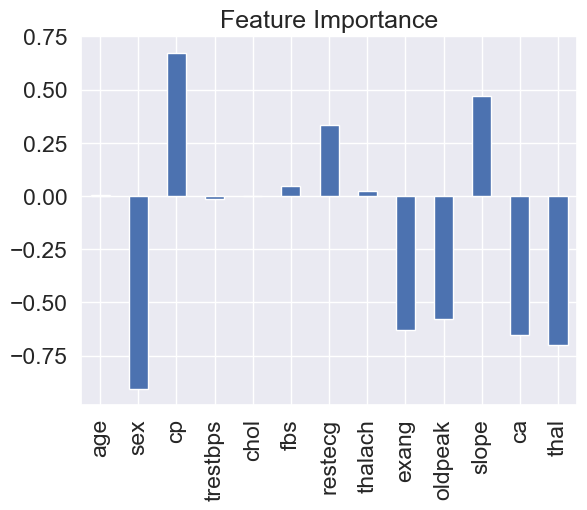

In [117]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False)

### Saving Macine Model

In [118]:
# Importing joblib
from joblib import dump,load
#Save the model to file
dump(clf,filename="Heart_Disease_Clasification_Linear_Regression_Model.joblib")

['Heart_Disease_Clasification_Linear_Regression_Model.joblib']

In [119]:
# Iporting saved model
loaded_ML_model=load("Heart_Disease_Clasification_Linear_Regression_Model.joblib")

In [121]:
#Make prediction
Final_preds=loaded_ML_model.predict(X_test)
Final_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [122]:
loaded_ML_model.score(X_test,y_test)

0.8852459016393442

### END OF Heart_Disease_Clasification ML Model